In [16]:
import os, sys, time, re, json
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
from io import BytesIO
import random

In [2]:
from unrealcv import client
client.connect()
if not client.isconnected():
    print('UnrealCV server is not running. Run the game downloaded from http://unrealcv.github.io first.')
    sys.exit(-1)
print(client.request('vget /unrealcv/status'))

INFO:__init__:234:Got connection confirm: b'connected to CityPark'


=> Info: Use inet client...
=>Info: using ip-port socket
Is Listening
Client Connected
9000
Configuration
Config file: C:/Program Files/Epic Games/UE_4.27/Engine/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



In [312]:
res = client.request('vget /objects').split(' ')
res.pop()
print(res)
print(res[len(res)-1])

['Ivy1_02HISMA', 'Ivy1_01HISMA', 'Ivy1_08HISMA', 'Ivy1_03HISMA', 'Ivy2_06HISMA', 'SM_WeepingWillow01HISMA', 'SM_Rock04_2HISMA', 'SM_Rock05HISMA', 'SM_Rock05_2HISMA', 'SM_Rock06HISMA', 'SM_Rock06_2HISMA', 'SM_Rock07_2HISMA', 'SM_Rock07HISMA', 'SM_Rock04_2HISMA_79', 'SM_Rock05_2HISMA_81', 'SM_Rock07_2HISMA_83', 'SM_Rock06_2HISMA_85', 'SM_Rock03HISMA', 'SM_Rock02HISMA', 'SM_Rock01HISMA', 'SM_Rock04HISMA', 'SM_Rock06HISMA_91', 'SM_Rock05HISMA_93', 'SM_Rock07HISMA_95', 'SM_Rock07HISMA_97', 'House01HISMA', 'Sidewalk03HISMA', 'SM_ParkSquare02_4HISMA', 'SM_ParkSquare01_5HISMA', 'SM_ParkSquare06_1HISMA', 'SM_ParkSquare02_8HISMA', 'SM_ParkSquare06_4HISMA', 'SM_ParkSquare10HISMA', 'SM_ParkSquare06_5HISMA', 'SM_ParkSquare06_3HISMA', 'SM_ParkSquare06_2HISMA', 'SM_ParkSquare02_7HISMA', 'SM_ParkSquare02_7HISMA_178', 'SM_ParkSquare02_1HISMA', 'SM_ParkSquare12_1HISMA', 'SM_ParkSquare05_4HISMA', 'SM_ParkSquare03_6HISMA', 'SM_ParkSquare03_3HISMA', 'SM_ParkSquare09_1HISMA', 'SM_ParkSquare09_3HISMA', 'SM_P

In [317]:
col = client.request('vget /cameras')
print(col)

PawnSensor FusionCameraSensor 


In [323]:
res = client.request('vget /camera/1/rotation')
print(res)

-20.176 -70.823 -0.001


[108  84  96 255]


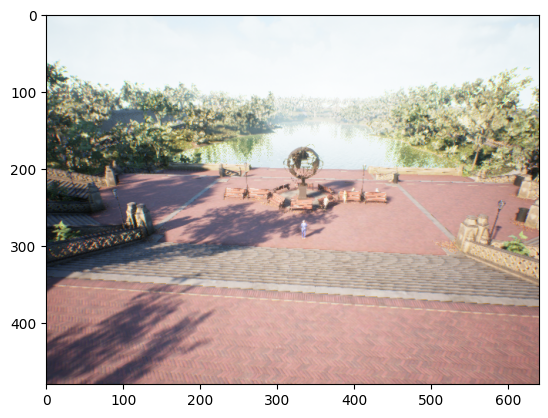

In [5]:
import unrealcv.util
res = client.request('vget /camera/1/lit png')
img = unrealcv.util.read_png(res)

print(img[400, 100])
#img = read_npy(res)
plt.imshow(img)

In [8]:
def parse_color(color_str):
    # Use regular expression to find all numbers
    numbers = re.findall(r'\d+', color_str)

    # Convert the list of strings to a list of integers
    array = list(map(int, numbers))
    return (array[0], array[1], array[2])

def parse_rotation(rotation_str):
    # Use regular expression to find all numbers including negatives and decimals
    numbers = re.findall(r'-?\d+\.\d+', rotation_str)

    # Convert the list of strings to a list of floats
    array = list(map(float, numbers))
    return (array[0], array[1], array[2])

In [313]:
# Get the list of all objects in the scene
scene_objects = client.request('vget /objects').split(' ')
scene_objects.pop()

person_colors = set()
for obj in scene_objects:
    color_str = client.request('vget /object/%s/color' % obj)
    color = parse_color(color_str)
    if (obj.startswith('SM_Child') or obj.startswith('SM_Couple') or obj.startswith('SM_Man') or obj.startswith('SM_Trio') or obj.startswith('SM_Woman')) and not obj.startswith('SM_Manhole'):
        if not color in person_colors:
            person_colors.add(color)
        else:
            print('Duplicate color:', color)
            sys.exit(-1)
    elif color in person_colors:
        print('Duplicate color:', color)
        sys.exit(-1)

In [ ]:
def annotate_persons(object_mask):
    


In [22]:
# get the cameras in the scene:
cameras = len(client.request('vget /cameras').split(' ')) - 1

rotation_factor = 0.8
randoms = random.sample(range(100000), 10000)

for i in range(1, cameras): # skip the first camera
    # get camera rotation
    rot_str = client.request('vget /camera/%d/rotation' % i)
    rot = parse_rotation(rot_str)
    print(rot)
    rotation_angle = 0
    while rotation_angle < 360:
        # set camera rotation
        client.request('vset /camera/%d/rotation %f %f %f' % (i, rot[0], rot[1] + rotation_angle, rot[2]))
        rotation_angle += rotation_factor
        lit_img = client.request('vget /camera/%d/lit png' % i)
        img = PIL.Image.open(BytesIO(lit_img))
        rand = randoms.pop()
        img.save("./data/img_%d.png" % rand)
        

(0.0, 164.2, 0.0)
